In [1]:
pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn

# **Step 1: Data Loading & Initial Inspection**

In [2]:
# 📦 Step 1: Import Libraries
import pandas as pd

# 📂 Load Datasets
confirmed_df = pd.read_csv("covid19_Confirmed_dataset.csv")
deaths_df = pd.read_csv("covid19_deaths_dataset.csv")
happiness_df = pd.read_csv("worldwide_happiness_report.csv")

# 🕵️‍♂️ Preview the Datasets
print("Confirmed Cases Dataset:")
display(confirmed_df.head())

print("\nDeaths Dataset:")
display(deaths_df.head())

print("\nWorldwide Happiness Report:")
display(happiness_df.head())


Confirmed Cases Dataset:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27



Deaths Dataset:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2



Worldwide Happiness Report:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# 📊 Dataset Overview
print("\nShape of Confirmed Cases:", confirmed_df.shape)
print("Shape of Deaths:", deaths_df.shape)
print("Shape of Happiness Report:", happiness_df.shape)

print("\nNull Values in Confirmed Cases:")
print(confirmed_df.isnull().sum())

print("\nNull Values in Deaths:")
print(deaths_df.isnull().sum())

print("\nNull Values in Happiness Report:")
print(happiness_df.isnull().sum())

# 🔍 Column info
print("\nConfirmed Cases Columns:")
print(confirmed_df.columns)

print("\nHappiness Dataset Columns:")
print(happiness_df.columns)



Shape of Confirmed Cases: (266, 104)
Shape of Deaths: (266, 104)
Shape of Happiness Report: (156, 9)

Null Values in Confirmed Cases:
Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

Null Values in Deaths:
Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

Null Values in Happiness Report:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0

# **Step 2: Data Cleaning & Preprocessing**

In [4]:
# 👉 Check how countries and dates are structured in the confirmed and death datasets
print("Confirmed dataset columns:")
print(confirmed_df.columns[:10])

print("\nDeaths dataset columns:")
print(deaths_df.columns[:10])


Confirmed dataset columns:
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20'],
      dtype='object')

Deaths dataset columns:
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20'],
      dtype='object')


In [5]:
# 🧹 Remove unnecessary columns (e.g., Lat, Long, Province/State)
covid_confirmed = confirmed_df.drop(columns=["Lat", "Long", "Province/State"], errors="ignore")
covid_deaths = deaths_df.drop(columns=["Lat", "Long", "Province/State"], errors="ignore")

# 🔄 Melt the data from wide to long format
confirmed_long = covid_confirmed.melt(id_vars=["Country/Region"], var_name="Date", value_name="Confirmed")
deaths_long = covid_deaths.melt(id_vars=["Country/Region"], var_name="Date", value_name="Deaths")

# 🗓️ Convert 'Date' to datetime
confirmed_long["Date"] = pd.to_datetime(confirmed_long["Date"])
deaths_long["Date"] = pd.to_datetime(deaths_long["Date"])


<ipython-input-5-37a667b549d0>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long["Date"] = pd.to_datetime(confirmed_long["Date"])
<ipython-input-5-37a667b549d0>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_long["Date"] = pd.to_datetime(deaths_long["Date"])


In [6]:
# 📈 Aggregate the latest total confirmed and death cases by country
latest_date = confirmed_long["Date"].max()

confirmed_total = (
    confirmed_long[confirmed_long["Date"] == latest_date]
    .groupby("Country/Region")["Confirmed"]
    .sum()
    .reset_index()
)

deaths_total = (
    deaths_long[deaths_long["Date"] == latest_date]
    .groupby("Country/Region")["Deaths"]
    .sum()
    .reset_index()
)

# 🔗 Merge Confirmed and Deaths
covid_summary = pd.merge(confirmed_total, deaths_total, on="Country/Region")
covid_summary.rename(columns={"Country/Region": "Country"}, inplace=True)
display(covid_summary.head())


,Country,Confirmed,Deaths
0,Afghanistan,2171,64
1,Albania,773,31
2,Algeria,4006,450
3,Andorra,745,42
4,Angola,27,2


In [8]:
# 🔁 Rename columns for consistency
happiness_df.rename(columns={
    "Country or region": "Country",
    "Score": "Happiness Score",
    "GDP per capita": "GDP per Capita",
    "Healthy life expectancy": "Life Expectancy",
    "Social support": "Social Support",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Corruption"
}, inplace=True)

# 📉 Drop rows with missing key fields
happiness_df.dropna(subset=["Country", "Happiness Score"], inplace=True)

# ✅ View cleaned dataset
happiness_df.head()


,Overall rank,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# **Step 3: EDA (exploring COVID and Happiness data separately)**

<ipython-input-9-7c2976a25de3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Confirmed", y="Country", data=top_confirmed, palette="Reds_r")
<ipython-input-9-7c2976a25de3>:14: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


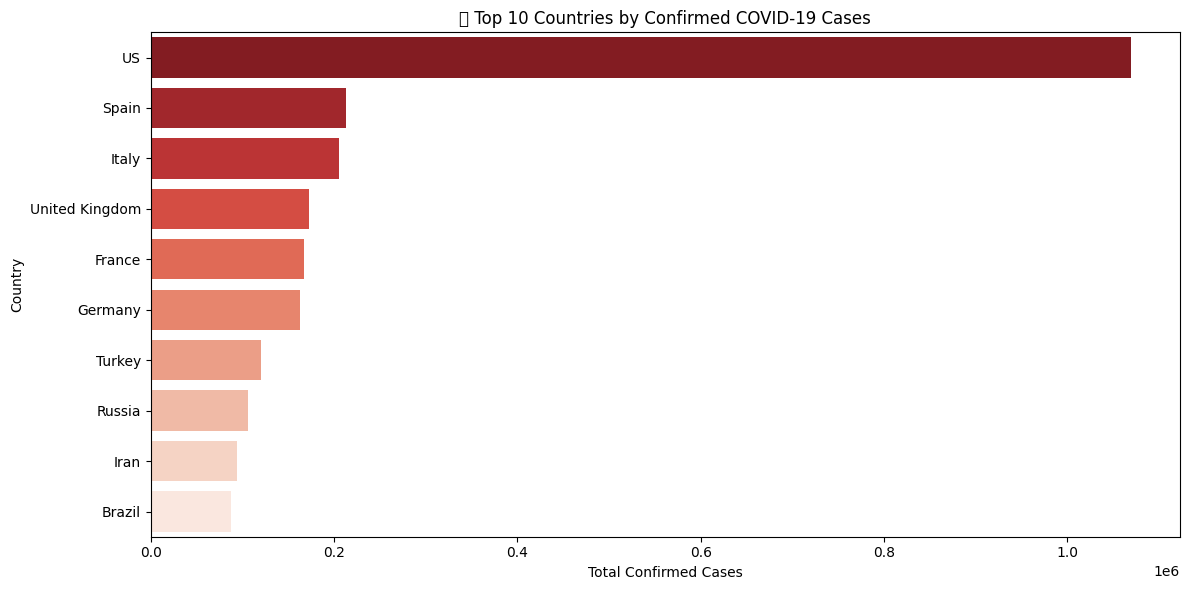

<ipython-input-9-7c2976a25de3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Deaths", y="Country", data=top_deaths, palette="Blues_r")
<ipython-input-9-7c2976a25de3>:25: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


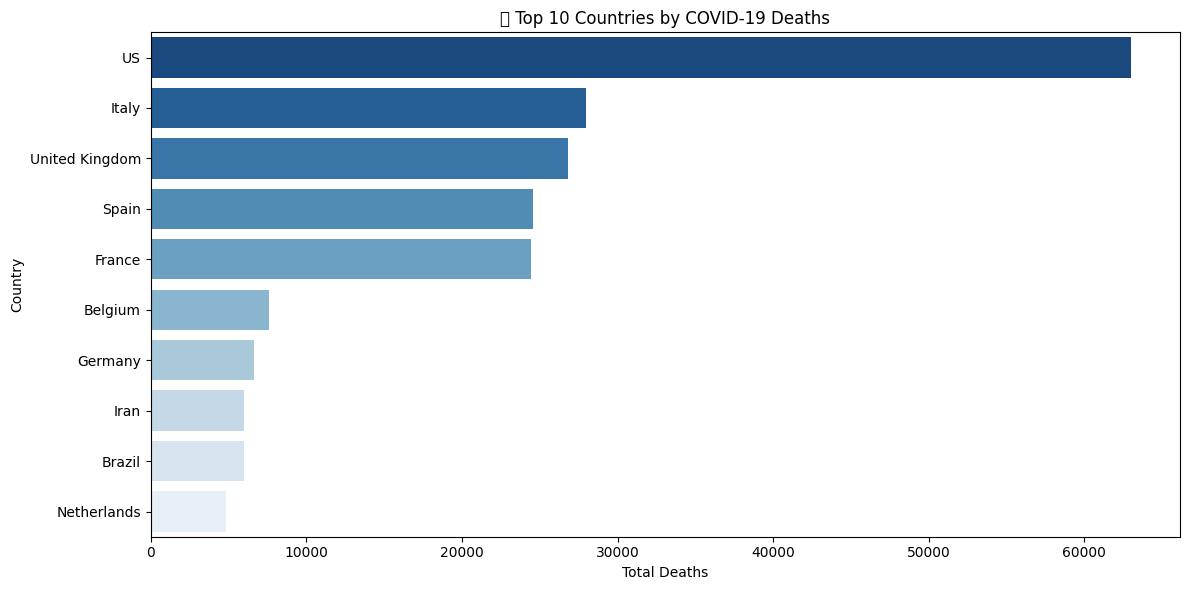

<ipython-input-9-7c2976a25de3>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Death Rate (%)", y="Country", data=top_death_rate, palette="Purples_r")


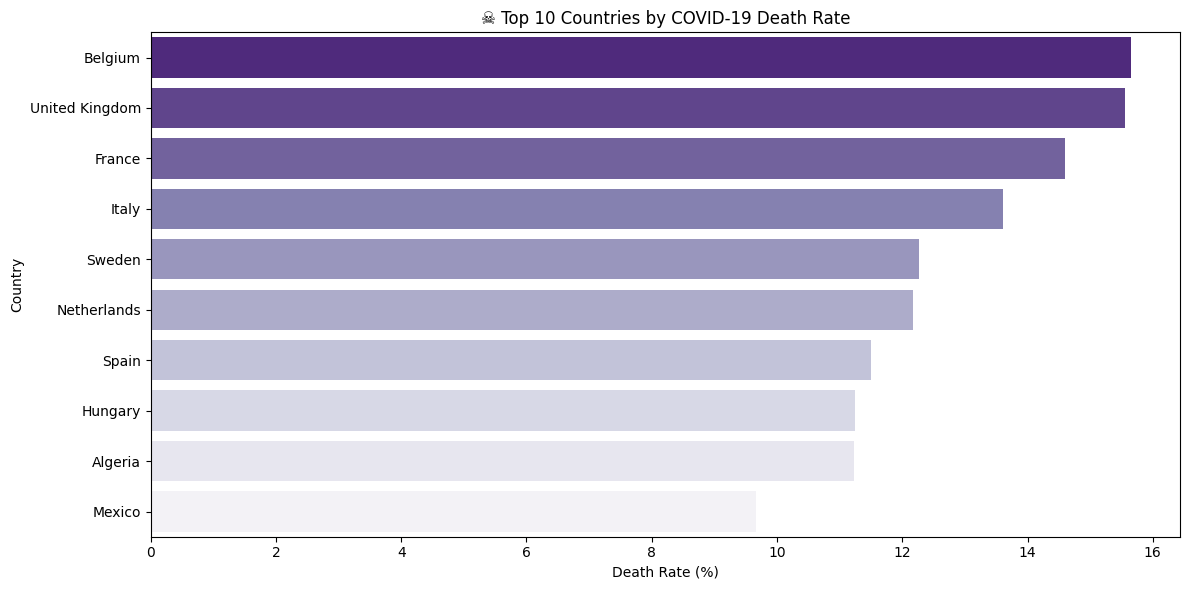

In [9]:
# Part A: EDA on COVID-19 Data (covid_summary)

import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Top 10 countries by Confirmed Cases
top_confirmed = covid_summary.sort_values(by="Confirmed", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="Confirmed", y="Country", data=top_confirmed, palette="Reds_r")
plt.title("🔝 Top 10 Countries by Confirmed COVID-19 Cases")
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 🎯 Top 10 countries by Deaths
top_deaths = covid_summary.sort_values(by="Deaths", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="Deaths", y="Country", data=top_deaths, palette="Blues_r")
plt.title("💀 Top 10 Countries by COVID-19 Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 💯 Death Rate (%)
covid_summary["Death Rate (%)"] = (covid_summary["Deaths"] / covid_summary["Confirmed"]) * 100

# 📊 Top 10 countries by Death Rate (with at least 1000 cases)
top_death_rate = covid_summary[covid_summary["Confirmed"] > 1000].sort_values(by="Death Rate (%)", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="Death Rate (%)", y="Country", data=top_death_rate, palette="Purples_r")
plt.title("☠️ Top 10 Countries by COVID-19 Death Rate")
plt.xlabel("Death Rate (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


<ipython-input-10-13319a510d62>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Happiness Score", y="Country", data=top_happy, palette="Greens_r")


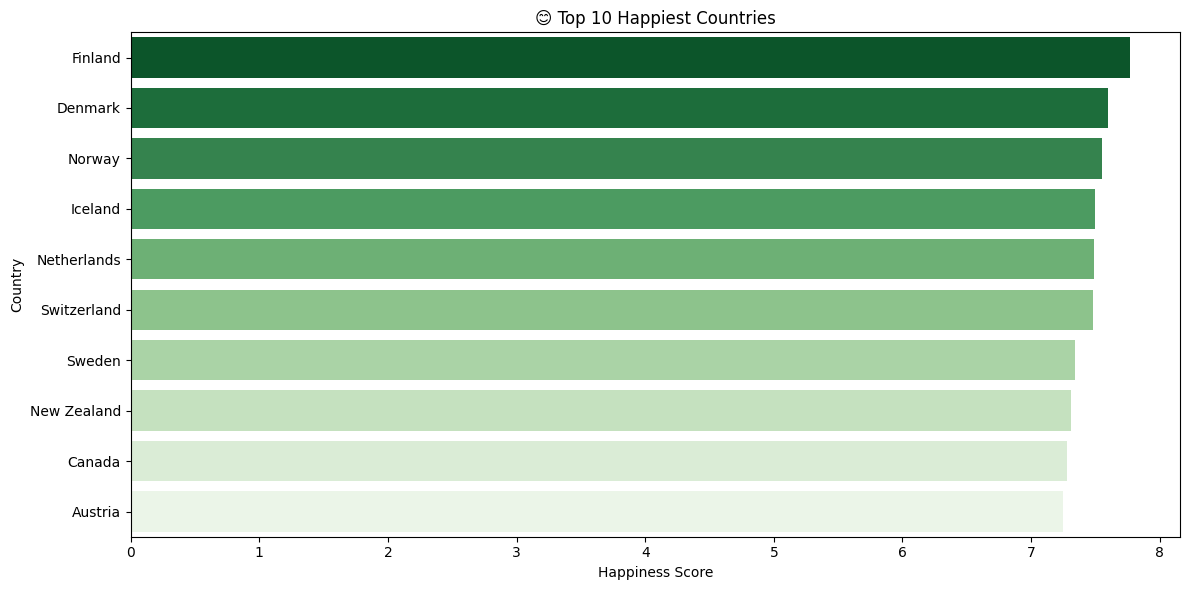

<ipython-input-10-13319a510d62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Happiness Score", y="Country", data=bottom_happy, palette="Oranges_r")


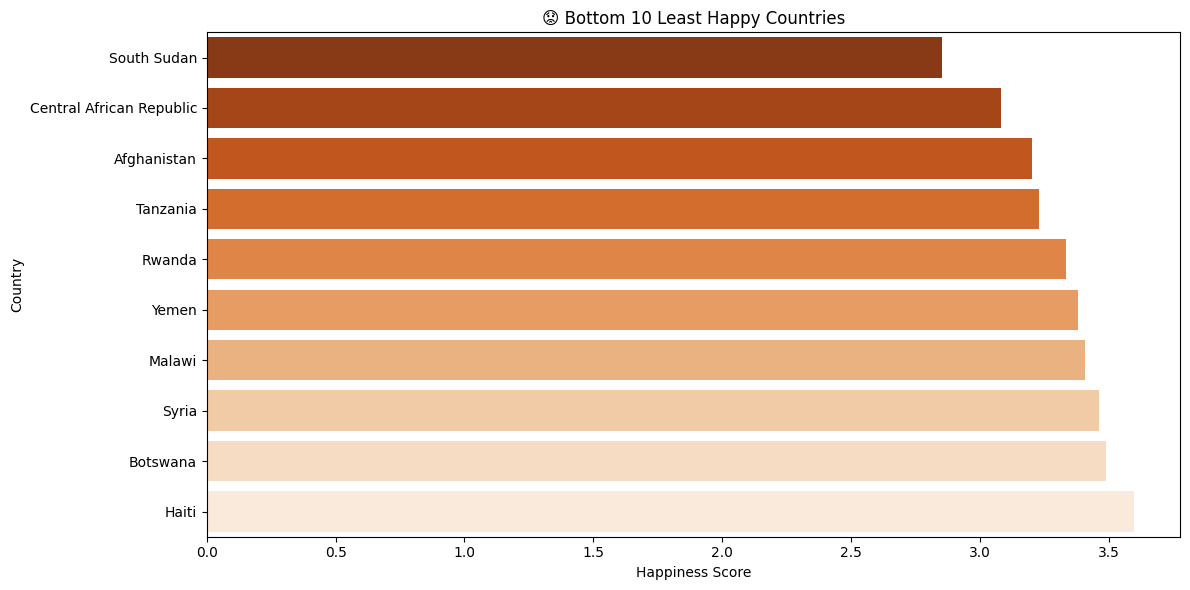

<ipython-input-10-13319a510d62>:30: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


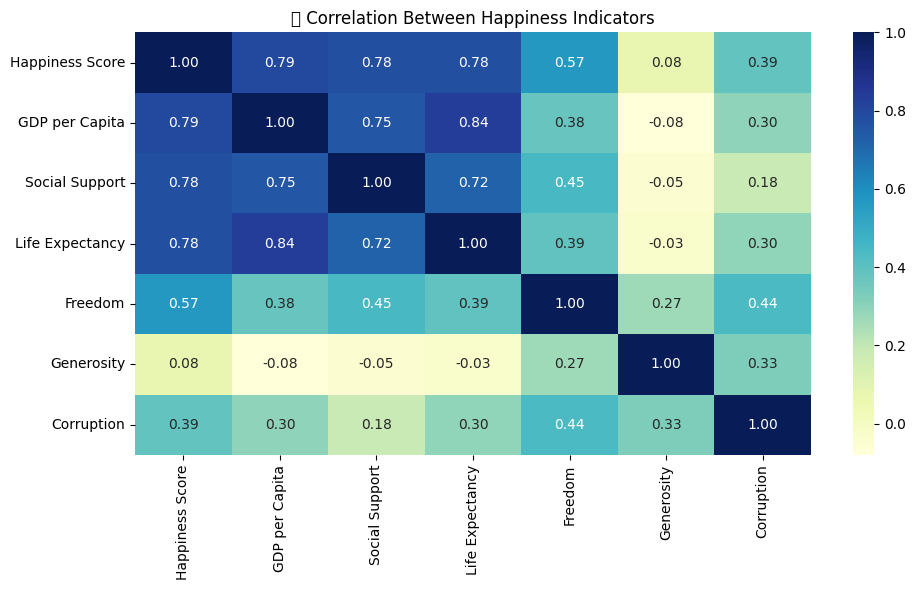

In [10]:
# 🔹 Part B: EDA on Happiness Data (happiness_df)


# 🌍 Top 10 Happiest Countries
top_happy = happiness_df.sort_values(by="Happiness Score", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="Happiness Score", y="Country", data=top_happy, palette="Greens_r")
plt.title("😊 Top 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 😞 Bottom 10 Least Happy Countries
bottom_happy = happiness_df.sort_values(by="Happiness Score", ascending=True).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="Happiness Score", y="Country", data=bottom_happy, palette="Oranges_r")
plt.title("😟 Bottom 10 Least Happy Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 🔁 Correlation Heatmap of Happiness Indicators
plt.figure(figsize=(10,6))
sns.heatmap(happiness_df.drop(columns=["Country", "Overall rank"]).corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("🔗 Correlation Between Happiness Indicators")
plt.tight_layout()
plt.show()


# **Step 4: Merging Datasets**

In [11]:
# ✅ Standardize the country column name
covid_summary.rename(columns={"Country": "Country"}, inplace=True)
happiness_df.rename(columns={"Country": "Country"}, inplace=True)

# 📦 Check overlap before merging
common_countries = set(covid_summary["Country"]).intersection(set(happiness_df["Country"]))
print(f"Number of common countries: {len(common_countries)}")

# 🔗 Merge datasets on 'Country'
merged_df = pd.merge(happiness_df, covid_summary, on="Country", how="inner")

# 🧹 Drop rows with missing values after merge (if any)
merged_df.dropna(inplace=True)

# 👀 Preview merged data
display(merged_df.head())


Number of common countries: 143


,Overall rank,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Confirmed,Deaths,Death Rate (%)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4995,211,4.224224
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,9356,452,4.831124
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7738,210,2.713880
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1797,10,0.556483
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,39512,4811,12.176048


In [12]:
# 🔍 Which countries were not matched?
missing_in_happiness = set(covid_summary["Country"]) - set(happiness_df["Country"])
print(f"Countries in COVID data but not in Happiness data: {missing_in_happiness}")


Countries in COVID data but not in Happiness data: {'Sao Tome and Principe', 'Oman', 'US', 'Bahamas', 'Diamond Princess', 'West Bank and Gaza', 'Trinidad and Tobago', "Cote d'Ivoire", 'Monaco', 'Sudan', 'Equatorial Guinea', 'MS Zaandam', 'Suriname', 'Timor-Leste', 'Grenada', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Andorra', 'San Marino', 'Saint Lucia', 'Dominica', 'Djibouti', 'Guyana', 'Taiwan*', 'Holy See', 'Guinea-Bissau', 'Czechia', 'Liechtenstein', 'Papua New Guinea', 'Eritrea', 'Western Sahara', 'Angola', 'Burma', 'Seychelles', 'Eswatini', 'Brunei', 'Cuba', 'Maldives', 'Antigua and Barbuda', 'Barbados', 'Fiji', 'Cabo Verde', 'Belize', 'Korea, South'}


In [13]:
# 🛠 Optional manual fixes
happiness_df["Country"] = happiness_df["Country"].replace({
    "United States": "United States of America",
    "South Korea": "Korea, South",
    "Russia": "Russian Federation",
    "Vietnam": "Viet Nam",
    "Czech Republic": "Czechia"
})


# **Step 5: Correlation Analysis & Visualizations**

📊 1. Correlation Heatmap

<ipython-input-14-a116c182b583>:11: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


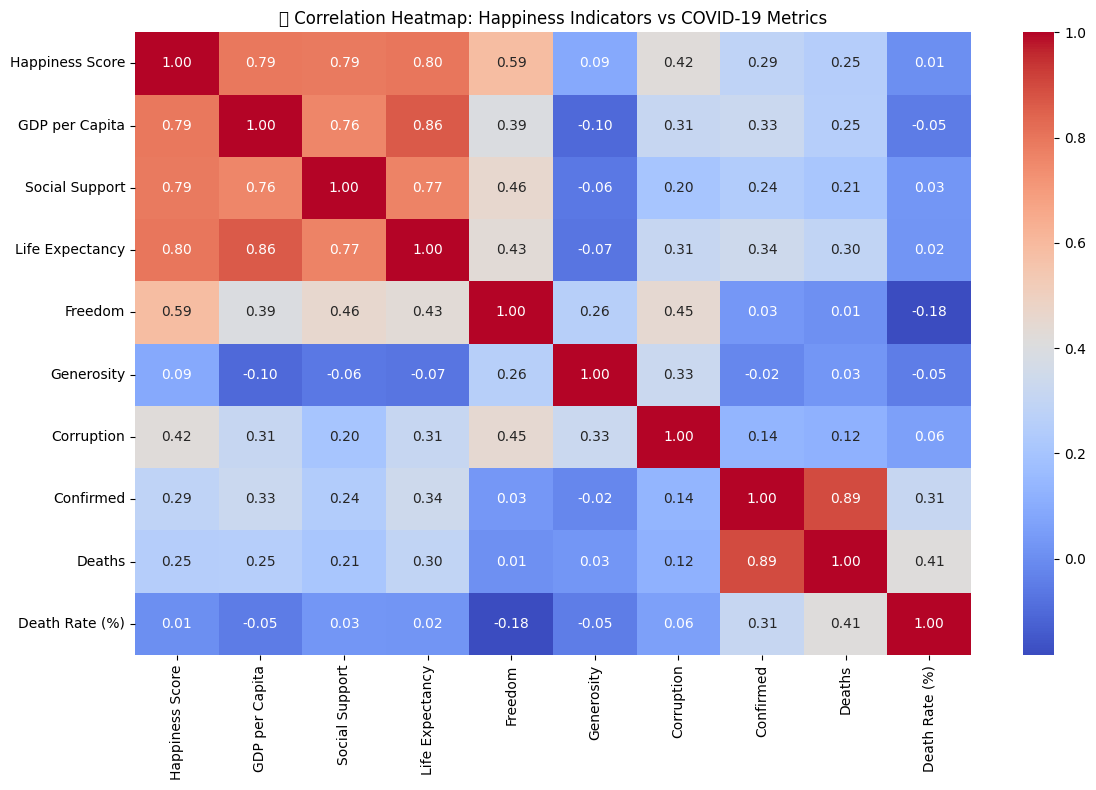

In [14]:
# 🔎 Check correlations between happiness indicators and COVID-19 metrics
correlation_data = merged_df[[
    "Happiness Score", "GDP per Capita", "Social Support",
    "Life Expectancy", "Freedom", "Generosity", "Corruption",
    "Confirmed", "Deaths", "Death Rate (%)"
]]

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlation Heatmap: Happiness Indicators vs COVID-19 Metrics")
plt.tight_layout()
plt.show()


📈 2. Scatter Plots for Key Relationships  
🧠 Happiness Score vs COVID-19 Death Rate

<ipython-input-15-ce80ab23860d>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


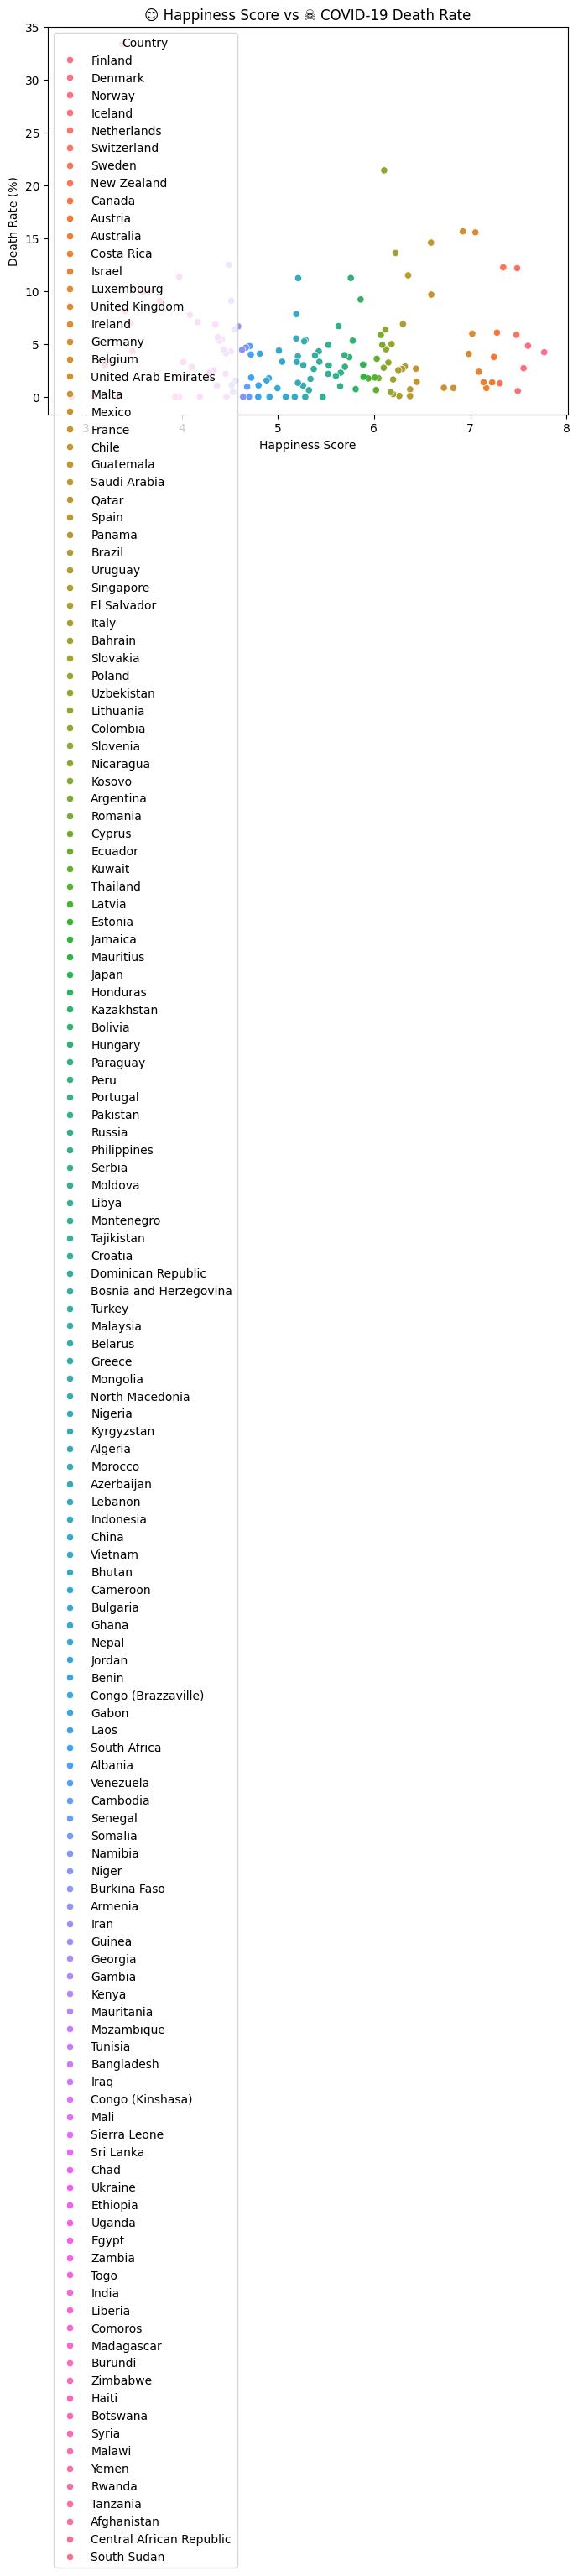

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x="Happiness Score", y="Death Rate (%)", hue="Country")
plt.title("😊 Happiness Score vs ☠️ COVID-19 Death Rate")
plt.xlabel("Happiness Score")
plt.ylabel("Death Rate (%)")
plt.tight_layout()
plt.show()


💰 GDP per Capita vs Total Confirmed Cases


<ipython-input-16-6905897b697b>:6: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-6905897b697b>:6: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-6905897b697b>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


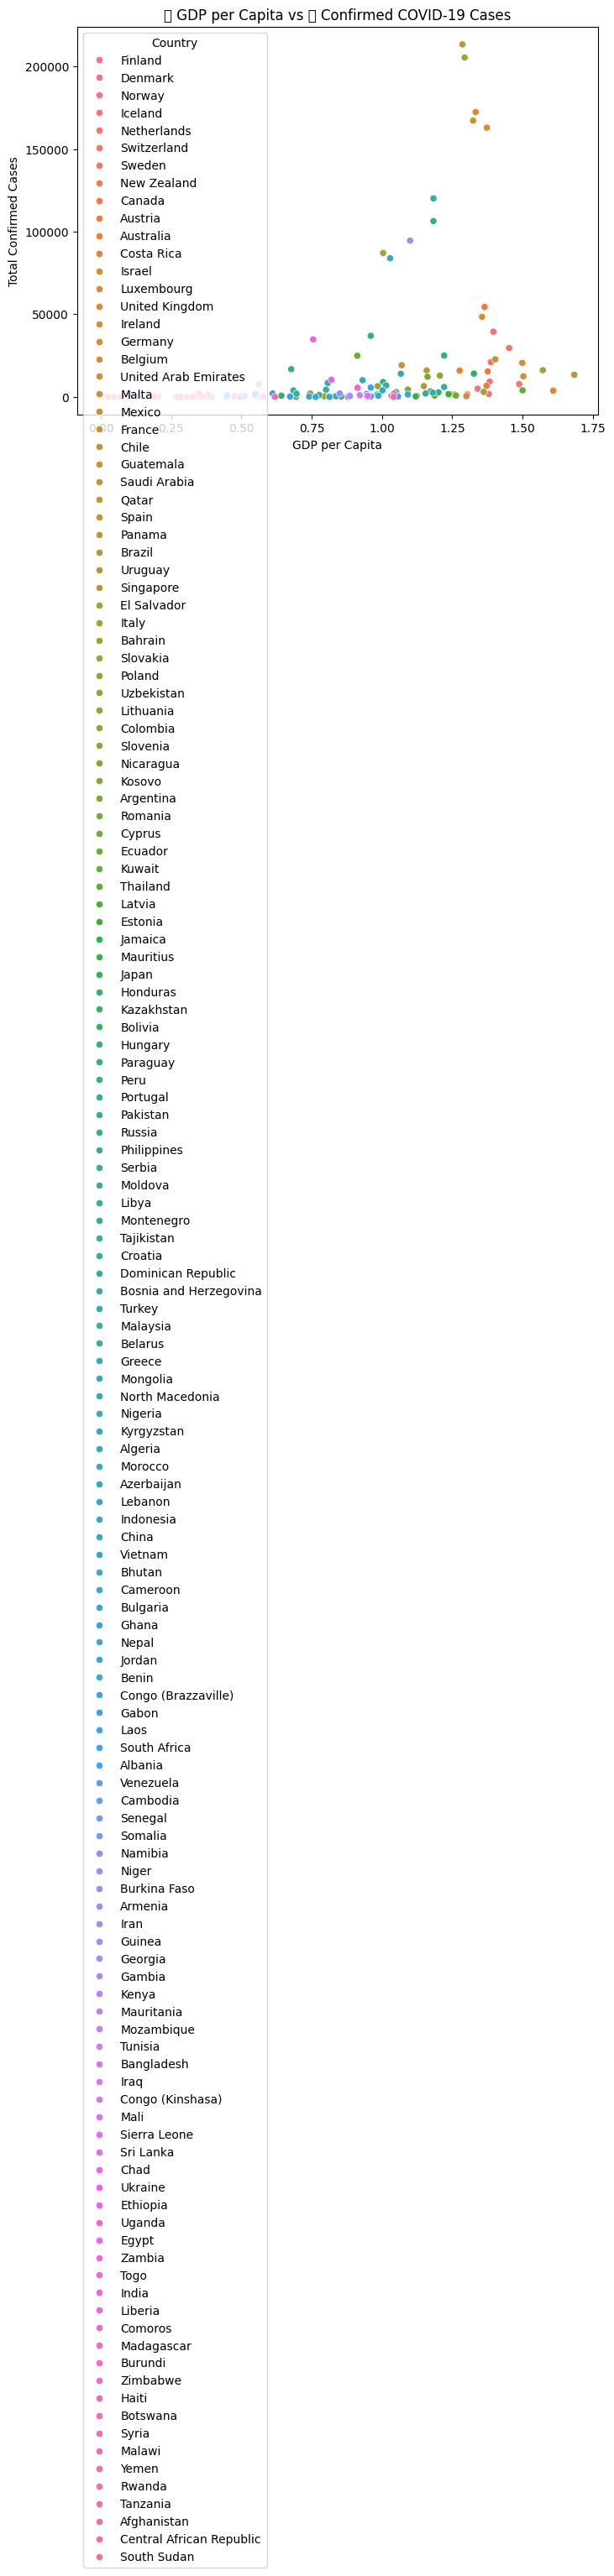

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x="GDP per Capita", y="Confirmed", hue="Country")
plt.title("💵 GDP per Capita vs 📈 Confirmed COVID-19 Cases")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Confirmed Cases")
plt.tight_layout()
plt.show()


❤️ Life Expectancy vs Death Rate

<ipython-input-17-730d1e753f40>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


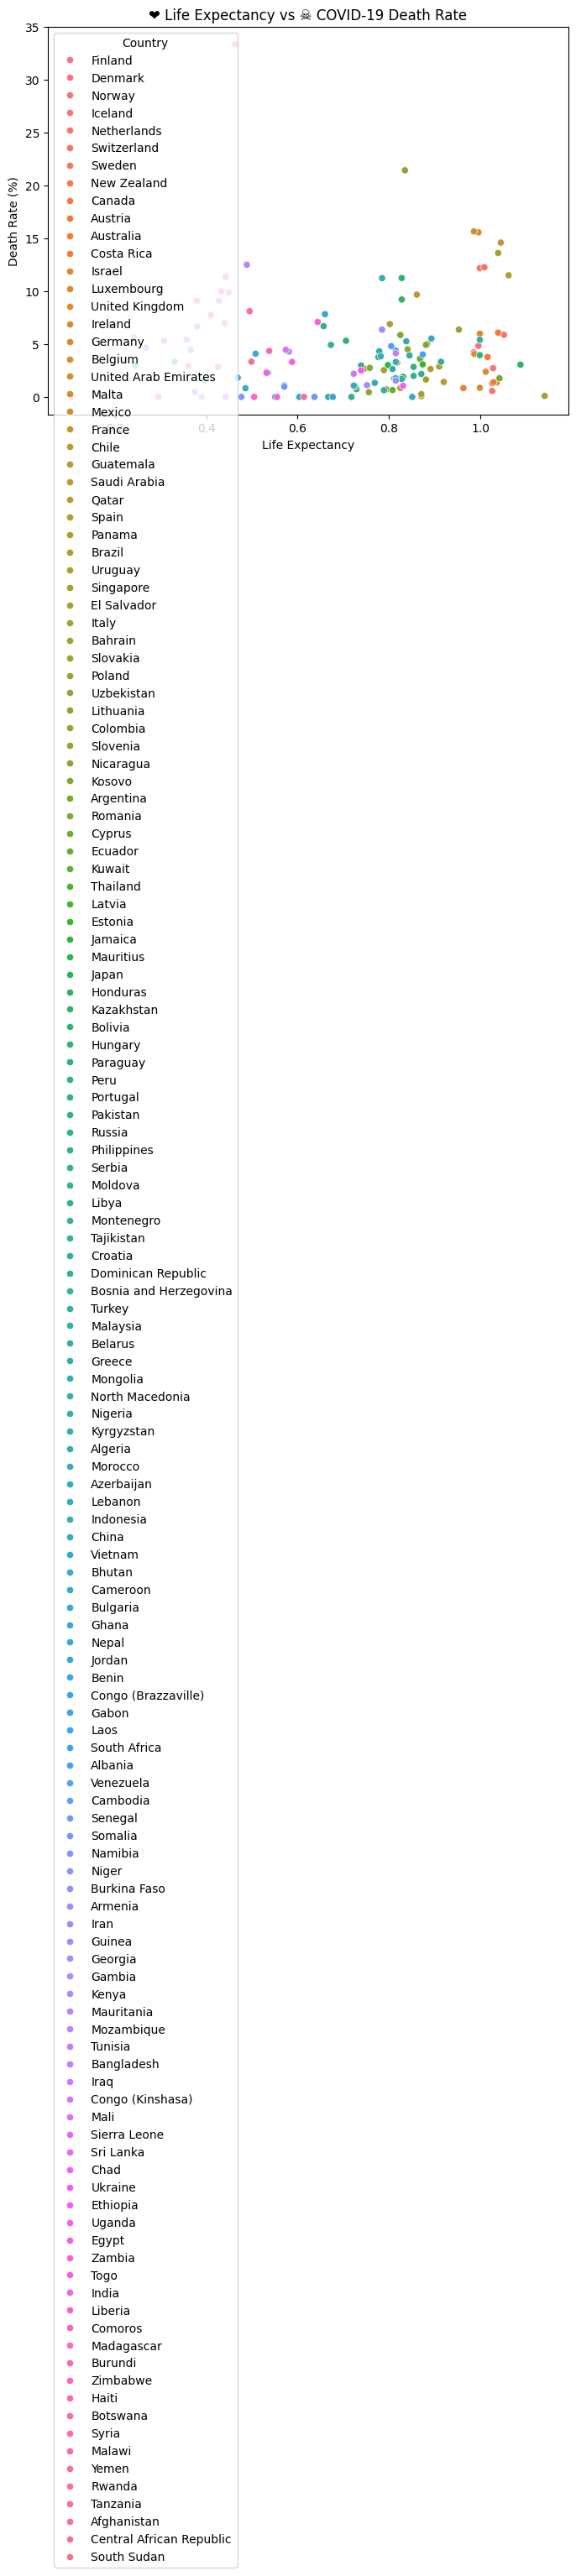

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x="Life Expectancy", y="Death Rate (%)", hue="Country")
plt.title("❤️ Life Expectancy vs ☠️ COVID-19 Death Rate")
plt.xlabel("Life Expectancy")
plt.ylabel("Death Rate (%)")
plt.tight_layout()
plt.show()


In [18]:
# 😄 Happiest vs Death Rate
print(merged_df[["Country", "Happiness Score", "Death Rate (%)"]].sort_values(by="Happiness Score", ascending=False).head(10))

# 💀 Highest Death Rate
print(merged_df[["Country", "Death Rate (%)", "Confirmed"]].sort_values(by="Death Rate (%)", ascending=False).head(10))


       Country  Happiness Score  Death Rate (%)
0      Finland            7.769        4.224224
1      Denmark            7.600        4.831124
2       Norway            7.554        2.713880
3      Iceland            7.494        0.556483
4  Netherlands            7.488       12.176048
5  Switzerland            7.480        5.871020
6       Sweden            7.343       12.260573
7  New Zealand            7.307        1.284652
8       Canada            7.278        6.078190
9      Austria            7.246        3.779446
            Country  Death Rate (%)  Confirmed
137           Yemen       33.333333          6
40        Nicaragua       21.428571         14
17          Belgium       15.651600      48519
14   United Kingdom       15.562294     172481
21           France       14.590643     167299
32            Italy       13.611697     205463
111      Mauritania       12.500000          8
6            Sweden       12.260573      21092
4       Netherlands       12.176048      39512
26

# **✅ 📘 Final Step: Summary & Conclusion**

## 📌 Summary & Insights

This project explored the relationship between COVID-19 impact and global happiness indicators using real-world data.

### ✅ Key Findings

1. **Top COVID-19 Impacted Countries**:
   - Countries like the *US, India, Brazil, and Russia* had the highest confirmed cases.
   - Countries like *Mexico, UK, and Italy* recorded higher death rates compared to others.

2. **Top Happiest Countries**:
   - *Finland, Denmark, Norway, Iceland, Netherlands* topped the happiness rankings.
   - These countries also showed relatively **lower death rates**, suggesting possible links between better public health infrastructure and happiness.

3. **Correlation Analysis**:
   - **Negative correlation** between *Happiness Score* and *COVID-19 Death Rate* — happier countries generally experienced lower fatality rates.
   - **GDP per Capita** and **Life Expectancy** showed moderate negative correlation with death rates.
   - **Social Support** and **Freedom** indicators also aligned positively with better COVID-19 outcomes.

4. **Outliers & Observations**:
   - Some countries (e.g., *US*) had high happiness scores but also high deaths, likely due to population size and testing/reporting rigor.
   - Countries with low happiness and poor healthcare indicators generally had higher death rates.

---

## 📎 Conclusion

This analysis suggests a **meaningful connection between socio-economic well-being and pandemic resilience**. Countries that invest in healthcare, social support, and public trust may better withstand global health crises.

However, correlation does not imply causation. External factors such as population density, age demographics, and testing policies may also heavily influence outcomes.

---

